In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

class SEIR:
    
    def __init__(self, R0, N, t_E, t_I, t_linspace):
        
        self.N = N
        self.sigma = 1 / t_E
        self.gamma = 1 / t_I
        self.R0 = R0
        self.beta = R0 / (N * t_I)
        self.t_linspace = t_linspace
        self.sol = self.generate_solution().y
        self.r = self.generate_r()
        
    def fun(self, t, y):
        
        S, E, I, R = y
        
        d_S_dt = - self.beta * S * I
        d_E_dt = self.beta * S * I - self.sigma * E
        d_I_dt = self.sigma * E - self.gamma * I
        d_R_dt = self.gamma * I 
        
        dydt = [d_S_dt, d_E_dt, d_I_dt, d_R_dt]
        
        return dydt
    
    def generate_solution(self, y0 = None, method = 'LSODA'):
        
        # This generates a solution over a linear time space t_linspace
        
        if y0 == None:
            y0 = [self.N - 1, 1, 0, 0]
        
        t0, tf = self.t_linspace[0], self.t_linspace[-1]
        
        return solve_ivp(self.fun, (t0, tf), y0, method, t_eval = self.t_linspace)

    def S(self):
        
        return self.sol[0]
    
    def E(self):
        
        return self.sol[1]
    
    def I(self):
        
        return self.sol[2]
    
    def R(self):
        
        return self.sol[3]
        
    def generate_r(self):
        
        return (1/2) * (- (self.sigma + self.gamma) + np.sqrt((self.sigma + self.gamma)** 2 + 4 * self.sigma * (self.beta * self.N - self.gamma)))
    
    def E_proportion_infected_population_limiting(self):
        
        return (self.gamma + self.r) / (self.sigma + self.gamma + self.r)
    
    
    def I_proportion_infected_population_limiting(self):
        
        return (self.sigma) / (self.sigma + self.gamma + self.r)

In [2]:
R0 = 3
N = 8000000
t_E, t_I = 1, 3
t_linspace = np.linspace(0, 80, 100 * 100)


SEIR_0 = SEIR(R0, N, t_E, t_I, t_linspace)

SEIR_0.r


0.3874258867227932

AttributeError: 'SEIR' object has no attribute 'traj'

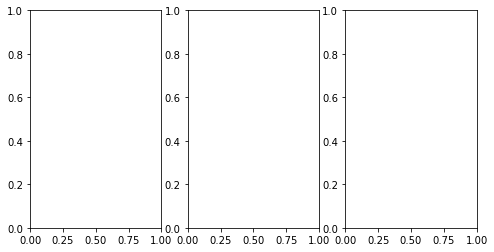

In [3]:
# Plots of the proportion of the infected population that is latent or infectious 

fig, axes = plt.subplots(1, 3, figsize = (8, 4))

E_proportion = [E / (E + I) for (E, I) in zip(SEIR_0.traj("E", sol), SEIR_0.traj("I", sol))]
I_proportion = [I / (E + I) for (E, I) in zip(SEIR_0.traj("E", sol), SEIR_0.traj("I", sol))]

r = SEIR_0.r(beta, N, sigma, gamma)

# p_E and p_I are the proportions of the infected population that are latent and infectious according to 
# the renewal equation approach

p_E = (gamma + r) / (sigma + gamma + r)
p_I = (sigma) / (sigma + gamma + r)


# Plot of the proportion of E(t) / (E(t) + I(t))
axes[0].plot(t_linspace, E_proportion)
axes[0].set_title("% of E + I that is E ")
axes[0].scatter(17, p_E, label = r"$p_E$")

# Plot of the proportion of I(t) / (E(t) + I(t))

axes[1].plot(t_linspace, I_proportion)
axes[1].set_title("% of E + I that is I")
axes[1].scatter(17, p_I, label = r"$p_I$")

# Plot of the trajectory E(t) + I(t) to show when exponential growth is happening

axes[2].plot(t_linspace, [E + I for (E,I) in zip(SEIR_0.traj("E", sol), SEIR_0.traj("I", sol))])
axes[2].set_title("E(t) + I(t)")

fig.savefig("Images/proof_proportions_E_I.png", dpi = 600)


plt.tight_layout()
plt.show()

In [4]:
# Plot interactive graph of the proportions of the infected population that are E and I

def interact_plot_E_I_proportion_infected_population(R0, t_E, t_I):
    
    N = 8000000
    t_linspace = np.linspace(0, 80, 100 * 100)
    
    SEIR_interact = SEIR(R0, N, t_E, t_I, t_linspace)
    
    fig, ax = plt.subplots()
    
    ax.plot(t_linspace, [E / (E + I) for (E, I) in zip(SEIR_interact.E(), SEIR_interact.I())], label = "E", color = 'blue')
    ax.scatter(2, SEIR_interact.E_proportion_infected_population_limiting(), label = r"$p_E$", color = "blue")
    ax.plot(t_linspace, [I / (E + I) for (E, I) in zip(SEIR_interact.E(), SEIR_interact.I())], label = "I", color = 'red')
    ax.scatter(2, SEIR_interact.I_proportion_infected_population_limiting(), label = r"$p_I$", color = "red")
    
    ax.set_title("Plots of the proportion of E+I that is E and I")
    ax.legend()
    plt.show()
    
interact(interact_plot_E_I_proportion_infected_population,
        R0 = (1.1, 3, 0.1),
        t_E = (0.5, 3, 0.5),
        t_I = (0.5, 3, 0.5))
    

interactive(children=(FloatSlider(value=2.0, description='R0', max=3.0, min=1.1), FloatSlider(value=1.5, descr…

<function __main__.interact_plot_E_I_proportion_infected_population(R0, t_E, t_I)>

In [3]:
np.sqrt(2)

1.4142135623730951